In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import randint, uniform

In [2]:
# df_old_analysis = pd.read_csv(r"..\1_Data\df_analysis.csv")
df_original = pd.read_csv(r"..\1_Data\df_cleaned.csv")
df_analysis = df_original.copy()
df_ML = df_analysis.copy()

In [3]:
pd.set_option('display.max_columns', None)
df_ML

,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,soldYear,soldT,soldPrice,sqmPrice,size_bucket,construction_age_band,in_conservation_area,area_code,sqm_approx
0,"30 Britton Close, London, SE6 1AP",SE6 1AP,England,SE6,51.445308,-0.008436,1.0,1.0,50.0,1.0,Leasehold,Purpose Built Flat,D,2023,T1,208700,4174.00,37-50m²,1983-1995,0,SE,50.0
1,"3 Ashley Lane, London, NW4 1HD",NW4 1HD,England,NW4,51.593783,-0.219289,2.0,2.0,95.0,1.0,Leasehold,Purpose Built Flat,D,2023,T1,2350000,24736.84,90m²-120m²,1950-1966,0,NW,95.0
2,"Flat H, 151 Gray's Inn Road, London, WC1X 8UB",WC1X 8UB,England,WC1X,51.524786,-0.116678,1.0,1.0,34.0,0.0,Leasehold,Flat/Maisonette,D,2023,T1,385000,11323.53,< 37m²,1983-1995,1,WC,35.0
3,"Flat 22, 67 Elm Park Gardens, London, SW10 9QE",SW10 9QE,England,SW10,51.487411,-0.175778,1.0,1.0,62.0,1.0,Leasehold,Purpose Built Flat,C,2023,T1,488000,7870.97,60-72m²,pre-1900,0,SW,60.0
4,"Flat 17, 102 West Ham Lane, London, E15 4FP",E15 4FP,England,E15,51.536422,0.006397,1.0,1.0,54.0,1.0,Leasehold,Flat/Maisonette,B,2023,T1,440000,8148.15,50-60m²,2012-onwards,0,E,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37578,"26 Risborough Close, Muswell Hill, London, N10...",N10 3PL,England,N10,51.590104,-0.140137,1.0,2.0,61.0,1.0,Leasehold,Flat/Maisonette,C,2024,T3,400000,6557.38,60-72m²,1930-1949,0,N,60.0
37579,"9 Harvard Road, London, SE13 6SE",SE13 6SE,England,SE13,51.452919,-0.010221,2.0,3.0,123.0,2.0,Freehold,End Terrace House,D,2024,T3,650000,5284.55,120m²-160m²,1900-1929,0,SE,125.0
37580,"Lower Ground Floor Flat 5, Northwood Hall, Hor...",N6 5PE,England,N6,51.571692,-0.137007,1.0,2.0,60.0,1.0,Leasehold,Purpose Built Flat,C,2024,T3,440000,7333.33,50-60m²,1930-1949,1,N,60.0
37581,"15 Chester Row, London, SW1W 9JF",SW1W 9JF,England,SW1W,51.493587,-0.152122,3.0,4.0,218.0,2.0,Freehold,Terrace Property,C,2024,T3,6250000,28669.72,> 200m²,pre-1900,1,SW,220.0


In [4]:
low = df_ML['sqmPrice'].quantile(0.01)
high = df_ML['sqmPrice'].quantile(0.95)
df_ML = df_ML[(df_ML['sqmPrice'] > low) & (df_ML['sqmPrice'] < high)]

In [5]:
df_ML.describe()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,soldYear,soldPrice,sqmPrice,in_conservation_area,sqm_approx
count,35327.000000,35327.000000,35327.000000,35327.000000,35327.000000,35327.000000,35327.000000,3.532700e+04,35327.000000,35327.000000,35327.000000
mean,51.509194,-0.114964,1.446910,2.362074,97.923175,1.223427,2023.332494,7.032616e+05,7047.742449,0.264925,97.908823
std,0.057635,0.090339,0.680987,1.275964,56.827242,0.582091,0.471113,5.466174e+05,2345.889320,0.441299,56.854057
min,51.386653,-0.347055,1.000000,1.000000,13.000000,0.000000,2023.000000,6.900000e+04,2022.060000,0.000000,15.000000
25%,51.463871,-0.183564,1.000000,1.000000,58.000000,1.000000,2023.000000,3.750000e+05,5432.100000,0.000000,60.000000
50%,51.501620,-0.115106,1.000000,2.000000,77.000000,1.000000,2023.000000,5.170000e+05,6734.690000,0.000000,75.000000
75%,51.551437,-0.050388,2.000000,3.000000,127.000000,1.000000,2024.000000,8.450000e+05,8394.195000,1.000000,125.000000
max,51.665454,0.138188,8.000000,9.000000,497.000000,7.000000,2024.000000,6.500000e+06,14236.110000,1.000000,495.000000


In [6]:
# %pip install lightgbm

In [7]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

# # Outlier filtering (sqmPrice 0.01 to 0.95)
# low, high = df_ML['sqmPrice'].quantile([0.01, 0.95])
# df_ML = df_ML[(df_ML['sqmPrice'] > low) & (df_ML['sqmPrice'] < high)].copy()

# 2. Native Categorical Prep
# Instead of dummies, we convert columns to the 'category' dtype
cat_features = ['propertyType', 'tenure', 'construction_age_band', 'currentEnergyRating']
for col in cat_features:
    df_ML[col] = df_ML[col].astype('category')

# 3. Numeric Prep
room_cols = ['bathrooms', 'bedrooms', 'livingRooms']
df_ML[room_cols] = df_ML[room_cols].fillna(0).astype(int)

# 4. Target and Feature Selection
# We keep the original strings! LightGBM will handle them.
X = df_ML.drop(columns=['soldPrice', 'soldT']) 
y = np.log1p(df_ML['soldPrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Target Encode Outcode (Neighborhood Value)
outcode_medians = X_train.groupby('outcode')['sqmPrice'].median()
global_median = X_train['sqmPrice'].median()
X_train['neighborhood_value'] = X_train['outcode'].map(outcode_medians)
X_test['neighborhood_value'] = X_test['outcode'].map(outcode_medians).fillna(global_median)

# 6. Final Feature Selection
# Notice we are including the categorical strings directly now
features = [
    'neighborhood_value', 'bathrooms', 'bedrooms', 'floorAreaSqM', 
    'livingRooms', 'in_conservation_area', 'latitude', 'longitude',
    'propertyType', 'tenure', 'construction_age_band', 'currentEnergyRating'
]

X_train_final = X_train[features]
X_test_final = X_test[features]

# 7. LightGBM with Native Categorical Support
best_lgbm_params = {
    'colsample_bytree': 0.736249827785696,
    'learning_rate': 0.036069452823590316,
    'max_depth': 11,
    'min_child_samples': 13,
    'n_estimators': 1325,
    'num_leaves': 133,
    'reg_alpha': 3.14471423389942,
    'reg_lambda': 4.387360067635265,
    'subsample': 0.8940284175215543,
    'random_state': 42,
    'n_jobs': -1,
    'importance_type': 'gain'
}

lgb_reg = lgb.LGBMRegressor(**best_lgbm_params)

# IMPORTANT: We tell the model which columns are categorical
print("Training LightGBM with Native Categorical Support...")
lgb_reg.fit(
    X_train_final, y_train,
    categorical_feature=cat_features
)

# 8. Evaluation
y_pred_log = lgb_reg.predict(X_test_final)
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_log)

# Calculate the Ratio: Real / Predicted
# 1.0 = Perfect, 1.1 = Real is 10% higher, 0.9 = Real is 10% lower
df_eval = pd.DataFrame({
    'pred': y_pred_real,
    'real': y_test_real,
    'ratio': y_test_real / (y_pred_real + 1)
})

# Define Price Bins (e.g., <400k, 400k-800k, 800k+)
bins = [0, 250000, 550000, 1000000, 1600000, np.inf]
labels = ['low', 'medium', 'high', 'very-high', 'luxury']

df_eval['price_bin'] = pd.cut(df_eval['pred'], bins=bins, labels=labels)

# Calculate 10th and 90th percentile (80% CI) for EACH bin separately
confidence_map_user = df_eval.groupby('price_bin')['ratio'].quantile([0.25, 0.75]).unstack()
confidence_map_company = df_eval.groupby('price_bin')['ratio'].quantile([0.10, 0.90]).unstack()

# Metrics
print("-" * 30)
print(f"LGBM R² Score: {r2_score(y_test_real, y_pred_real):.4f}")
print(f"LGBM MAPE:     {mean_absolute_percentage_error(y_test_real, y_pred_real):.2%}")
print("-" * 30)
print("USER: Confidence Multipliers per Price Range:")
print(confidence_map_user)
print("COMPANY: Confidence Multipliers per Price Range:")
print(confidence_map_company)

C:\Users\a_gal\AppData\Local\Temp\ipykernel_9008\735196125.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML[col] = df_ML[col].astype('category')
C:\Users\a_gal\AppData\Local\Temp\ipykernel_9008\735196125.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML[col] = df_ML[col].astype('category')
C:\Users\a_gal\AppData\Local\Temp\ipykernel_9008\735196125.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Training LightGBM with Native Categorical Support...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 28261, number of used features: 12
[LightGBM] [Info] Start training from score 13.255649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

C:\Users\a_gal\AppData\Local\Temp\ipykernel_9008\735196125.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confidence_map_user = df_eval.groupby('price_bin')['ratio'].quantile([0.25, 0.75]).unstack()
C:\Users\a_gal\AppData\Local\Temp\ipykernel_9008\735196125.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confidence_map_company = df_eval.groupby('price_bin')['ratio'].quantile([0.10, 0.90]).unstack()


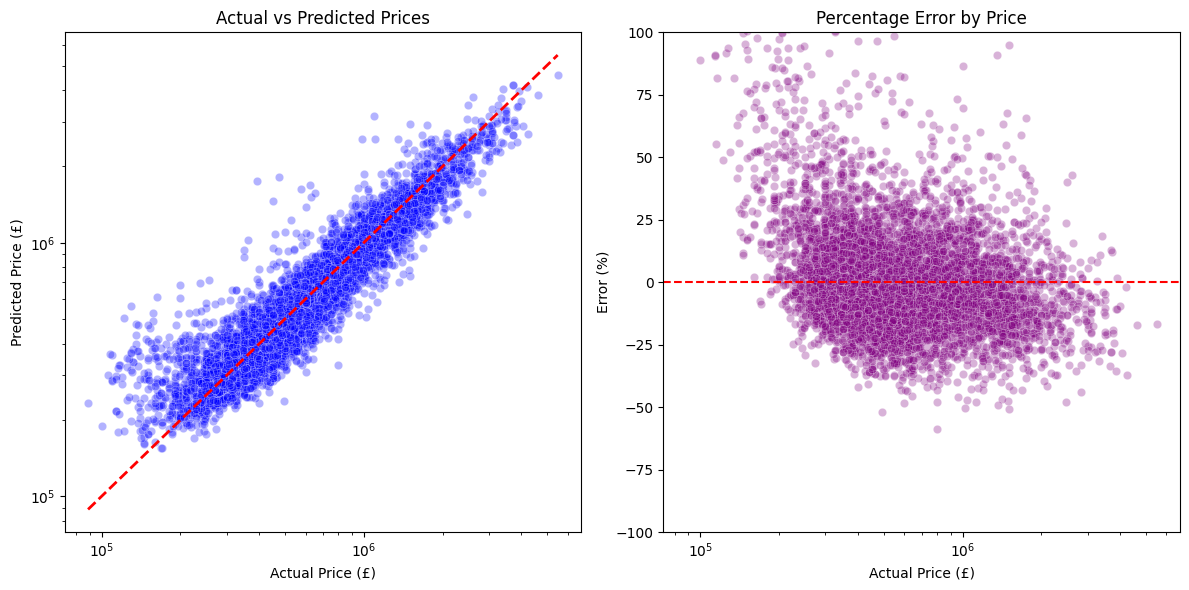

--- Analysis for ~£500k Houses ---
Average Error Amount: £66,477
Average Error %:      13.24%


In [8]:
# Create a DataFrame for plotting
results = pd.DataFrame({
    'Actual': y_test_real,
    'Predicted': y_pred_real
})

# Calculate the error for each specific house
results['Error_Amount'] = results['Predicted'] - results['Actual']
results['Error_Percent'] = (results['Error_Amount'] / results['Actual']) * 100

plt.figure(figsize=(12, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.3, color='blue')
# Draw a red line for "Perfect Prediction"
plt.plot([results['Actual'].min(), results['Actual'].max()], 
         [results['Actual'].min(), results['Actual'].max()], 
         color='red', lw=2, linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price (£)')
plt.ylabel('Predicted Price (£)')
plt.xscale('log') # Log scale helps see the spread better
plt.yscale('log')

# Plot 2: How big is the error at different price points?
plt.subplot(1, 2, 2)
sns.scatterplot(x='Actual', y='Error_Percent', data=results, alpha=0.3, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Percentage Error by Price')
plt.xlabel('Actual Price (£)')
plt.ylabel('Error (%)')
plt.xscale('log')
plt.ylim(-100, 100) # Zoom in to +/- 100% error

plt.tight_layout()
plt.show()

# Let's check the error specifically for houses around 500k
subset_500k = results[(results['Actual'] > 450000) & (results['Actual'] < 550000)]
avg_error_500k = subset_500k['Error_Amount'].abs().mean()
avg_mape_500k = subset_500k['Error_Percent'].abs().mean()

print(f"--- Analysis for ~£500k Houses ---")
print(f"Average Error Amount: £{avg_error_500k:,.0f}")
print(f"Average Error %:      {avg_mape_500k:.2f}%")

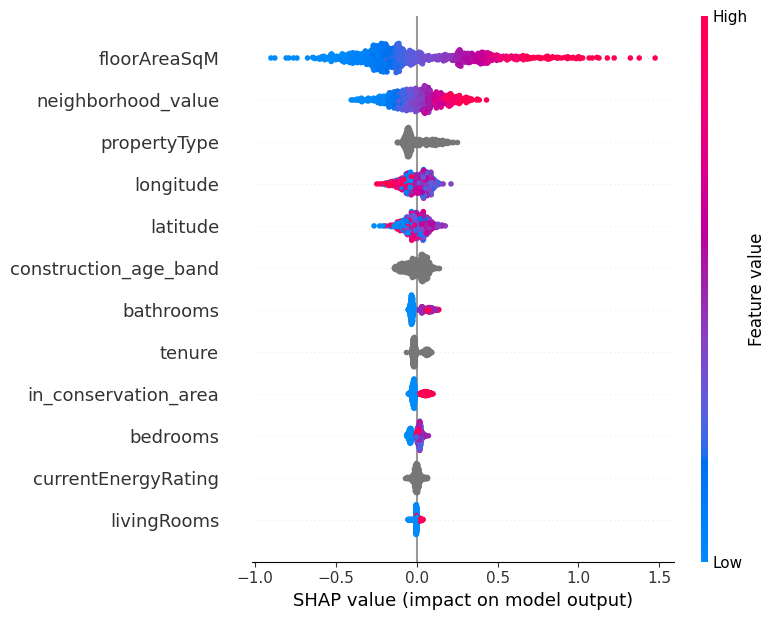

In [9]:
import shap

# 1. Initialize the SHAP Explainer
explainer = shap.TreeExplainer(lgb_reg)

# 2. Filter the sample to ONLY the features used in the model
# We take the sample from X_test_final, which is already cleaned!
X_sample = X_test_final.sample(1000, random_state=42)

# 3. Calculate SHAP values
# We use check_additivity=False to avoid small log-transform rounding errors
shap_values = explainer.shap_values(X_sample, check_additivity=False)

# 4. Plot the Summary
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_sample, plot_type="dot")

In [10]:
# # RANDOM SEARCH + CROSS VALIDATION

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform
# import lightgbm as lgb

# # 1. Define the Parameter Space
# # Note: LightGBM uses 'num_leaves' as the main complexity control
# param_dist_lgb = {
#     'n_estimators': randint(500, 1500),
#     'learning_rate': uniform(0.01, 0.1),
#     'num_leaves': randint(20, 150),          # The most important LGBM parameter
#     'max_depth': randint(5, 15),             # Can still be used to prevent deep-tree overfitting
#     'min_child_samples': randint(10, 50),    # Equivalent to min_child_weight
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4),
#     'reg_alpha': uniform(0, 5),
#     'reg_lambda': uniform(0, 5)
# }

# # 2. Initialize the Base Model
# lgb_base = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# # 3. Setup the Random Search
# # Use the same 'neg_mean_absolute_error' you used for XGBoost
# random_search_lgb = RandomizedSearchCV(
#     estimator=lgb_base,
#     param_distributions=param_dist_lgb,
#     n_iter=50,
#     cv=3,
#     scoring='neg_mean_absolute_error',
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # 4. Run the Search
# print("Starting LightGBM Random Search...")
# # If using the 'Definitive' categorical code, pass the category names here
# random_search_lgb.fit(
#     X_train_final, y_train,
#     categorical_feature=['propertyType', 'tenure', 'construction_age_band', 'currentEnergyRating']
# )

# # 5. Review Results
# print("-" * 30)
# print(f"Best LGBM Parameters: {random_search_lgb.best_params_}")
# print(f"Best Score (MAE): {-random_search_lgb.best_score_:.4f}")
# print("-" * 30)

In [11]:
# %pip install pgeocode

In [12]:
import pickle

print("⏳ Saving the brain...")

# 1. Create the Neighborhood Value Map (Still needed for the model)
neighborhood_dict = outcode_medians.to_dict()

# 2. Get Dropdown Options
dropdown_options = {
    'propertyType': list(df_ML['propertyType'].unique()),
    'tenure': list(df_ML['tenure'].unique()),
    'construction_age_band': list(df_ML['construction_age_band'].unique()),
    'currentEnergyRating': list(df_ML['currentEnergyRating'].unique()),
    'global_median_price': global_median 
}

# 3. Define Feature Order
feature_order = features 

# 4. Pack it (Notice: NO coords_map anymore)
model_payload = {
    'model': lgb_reg,                
    'neighborhood_map': neighborhood_dict,
    'options': dropdown_options,
    'features': feature_order,
    'confidence_bins': {
        'bins': [0, 250000, 550000, 1000000, 1600000, float('inf')],
        'map_user': confidence_map_user.to_dict('index'),       # The 50% range
        'map_company': confidence_map_company.to_dict('index') # The 80% range
    }
}

with open('Watson_LGBM.pkl', 'wb') as f:
    pickle.dump(model_payload, f)

print("✅ Brain saved! No coordinates map needed.")

⏳ Saving the brain...
✅ Brain saved! No coordinates map needed.
